In [30]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import flopy
from flopy.discretization import UnstructuredGrid


In [9]:
ruta = '/home/luiggi/GitSites/MODFLOW/flopy/examples/data/unstructured/'

In [10]:
# Simple functions to load vertices and incidence lists
def load_verts(fname):
    return(np.genfromtxt(fname))

def load_iverts(fname):
    f = open(fname, 'r')
    iverts = []
    xc = []
    yc = []
    for line in f:
        ll = line.strip().split()
        iverts.append([int(i) - 1 for i in ll[4:]])
        xc.append(float(ll[1]))
        yc.append(float(ll[2]))
    return iverts, np.array(xc), np.array(yc)

In [23]:
# load vertices
fname = os.path.join(ruta, 'ugrid_verts.dat')
verts = load_verts(fname)[:, 1:]
#print(verts)

# load the incidence list into iverts
fname = os.path.join(ruta, 'ugrid_iverts.dat')
iverts, xc, yc = load_iverts(fname)
#print(iverts)

In [25]:
ncpl = np.array(5 * [len(iverts)])
# using the SpatialReferenceUnstructured class since UnstructuredModelGrid has not been created yet
disu_mg = UnstructuredGrid(verts, iverts, xc, yc, ncpl=ncpl)
disu_sr = flopy.utils.reference.SpatialReferenceUnstructured(xc, yc, verts, iverts, ncpl)

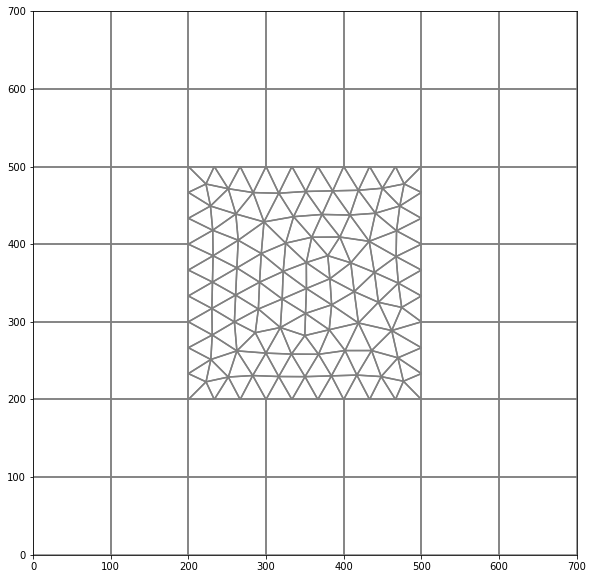

In [31]:
f = plt.figure(figsize=(10, 10))
mapview = flopy.plot.PlotMapView(modelgrid=disu_mg)

linecollection = mapview.plot_grid()

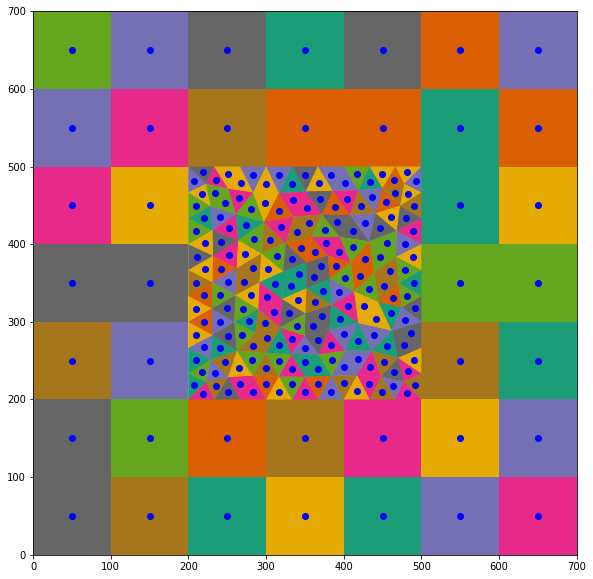

In [39]:
f = plt.figure(figsize=(10, 10))
a = np.random.random((ncpl[0]))
pmv = flopy.plot.PlotMapView(modelgrid=disu_mg)
pmv.plot_array(a)
plt.plot(xc, yc, 'bo');

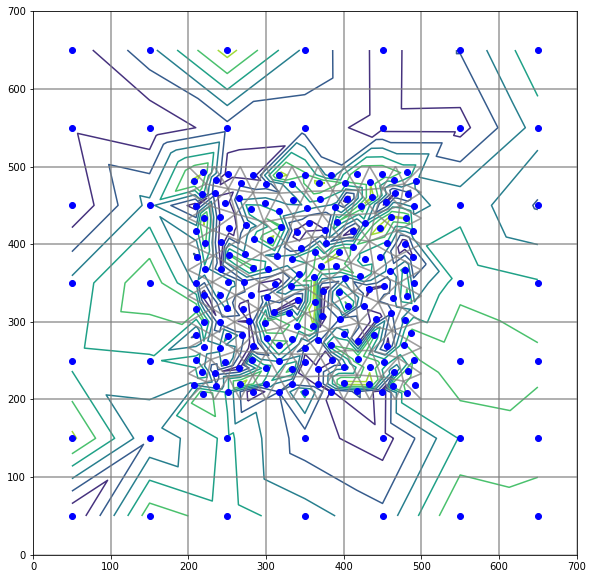

In [40]:
f = plt.figure(figsize=(10, 10))
a = np.random.random((ncpl[0]))
mv = flopy.plot.PlotMapView(modelgrid=disu_mg)
mv.contour_array(a)
mv.plot_grid(alpha=0.5)
plt.plot(xc, yc, 'bo');